# UNSUPERVISED LEARNING - DIMENSIONALITY REDUCTION

1. What is Dimensionality Reduction?
2. Why is Dimensionality Reduction required?
3. Common Dimensionality Reduction Techniques
 - Missing Value Ratio
 - Low Variance Filter
 - High Correlation Filter
 - Random Forest
 - Recursive Feature Elimination
 - Forward Feature Selection
 - Factor Analysis
 - Principal Component Analysis
 - Independent Component Analysis
 - Methods Based on Projections
 - t-Distributed Stochastic Neighbor Embedding (t-SNE)
 - UMAP
4. Applications of Various Dimensionality Reduction Techniques

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the data
df_train=pd.read_csv("train.csv", na_values='NaN')
print(df_train.shape)
df_train.head()

(8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df_train.info() # Item_Weight converted to float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
# Check the percentage of missing values in each variable
df_train.isnull().sum()/len(df_train)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

## SECTION 3

### 3.1 MISSING VALUE RATIO

In [5]:
# Save missing values in a variable
percent_missing = df_train.isnull().sum()/len(df_train)*100

# Remove the columns having more than 20% missing values
mart_columns = df_train.columns
columns_to_use = []
for n in range(0, 12):
    if percent_missing[n] <= 20:   # set the threshold as 20%
        columns_to_use.append(mart_columns[n])

In [6]:
columns_to_use  # Outlet_Size dropped

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### 3.2 LOW VARIANCE FILTER

Consider a feature in our dataset where all the observations have the same value, say 1. If we use this feature, do you think it can improve the model we will build? The answer is `no`, because this feature will have zero variance.

So, we need to calculate the variance of each feature we are given. Then drop the features having low variance as compared to other features in our dataset. The reason for doing this is that features with a low variance will not affect the target.

Let’s first impute the missing values in the Item_Weight column using the median value of the known `Item_Weight` observations. For the `Outlet_Size` column, we will use the mode of the known `Outlet_Size` values to impute the missing values:

In [8]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].median, inplace=True)
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0], inplace=True)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 799.2+ KB


In [10]:
df_train.isnull().sum()/len(df_train)*100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [11]:
#df_train.var()  # unbiased variance

The variance of `Item_Visibility` is very small compared to the other features. We can safely drop this feature. This is how we apply low variance filter.

In [ ]:
numeric_df = df_train[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]
numeric_feature_variance = numeric_df.var()
numeric_columns = numeric_df.columns
columns_to_use = [ ]
for n in range(0, len(numeric_feature_variance)):
    if numeric_feature_variance[n] >= 10:   # setting the threshold as 10%
        columns_to_use.append(numeric_columns[n+1])

In [17]:
columns_to_use  # Item_Visibility dropped.  Item_Outlet_Sales is our target

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

### 3.3 HIGH CORRELATION FILTER

High correlation between two features means that they have similar trends and are likely to carry similar information. This can bring down the performance of some models drastically (linear and logistic regression models, for instance). We can calculate the correlation between independent features that are numerical in nature. If the correlation coefficient crosses a certain threshold value, we can drop one of the features (dropping a feature is highly subjective and should always be done keeping the domain in mind).

As a general guideline, we should keep those features which show a decent or high correlation with the target variable.

We will drop the `target (Item_Outlet_Sales)` first and save the remaining features in a new dataframe (df).

In [ ]:
df = df_train.drop('Item_Outlet_Sales', axis=1)
df.corr()

In [19]:
df.columns  # remaining columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

We don’t have any features with a high correlation in our dataset. Generally, if the correlation between a pair of features is greater than 0.5-0.6, we should seriously consider dropping one of those features.

### 3.4 RANDOM FOREST

Random Forest is one of the most widely used algorithms for feature selection. It comes packaged with in-built feature importance so you don’t need to code that separately. This helps us select a smaller subset of features.

We need to convert the data into numeric form by applying one hot encoding, as Random Forest (scikit-Learn implementation) takes only numeric inputs. Let’s also drop the ID variables (Item_Identifier and Outlet_Identifier) as these are just unique numbers and hold no significant importance.

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 799.2+ KB


In [22]:
df_train.Item_Weight.isnull().sum()

0

In [23]:
rf_model = RandomForestRegressor(random_state=1, max_depth=10)

# Drop Identifier features: Item_Identifier, Outlet_Identifier
numerical_cols = ['Item_MRP', 'Item_Visibility', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

df_numeric = df_train[numerical_cols]
df_categorical = df_train[categorical_cols]
dummies = pd.get_dummies(df_categorical, drop_first=True, prefix_sep='_', columns=categorical_cols)

df_mart = pd.concat([df_numeric, dummies], axis=1)  # concatenate the two DataFrames horizontally
print(df_mart.shape)
df_mart.head()

(8523, 30)


,Item_MRP,Item_Visibility,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,249.8092,0.016047,1999,3735.1380,True,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
1,48.2692,0.019278,2009,443.4228,False,True,False,False,False,False,...,False,True,False,True,False,False,True,False,True,False
2,141.6180,0.016760,1999,2097.2700,True,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
3,182.0950,0.000000,1998,732.3800,False,True,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
4,53.8614,0.000000,1987,994.7052,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False


In [24]:
df_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_MRP                         8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Outlet_Establishment_Year        8523 non-null   int64  
 3   Item_Outlet_Sales                8523 non-null   float64
 4   Item_Fat_Content_Low Fat         8523 non-null   bool   
 5   Item_Fat_Content_Regular         8523 non-null   bool   
 6   Item_Fat_Content_low fat         8523 non-null   bool   
 7   Item_Fat_Content_reg             8523 non-null   bool   
 8   Item_Type_Breads                 8523 non-null   bool   
 9   Item_Type_Breakfast              8523 non-null   bool   
 10  Item_Type_Canned                 8523 non-null   bool   
 11  Item_Type_Dairy                  8523 non-null   bool   
 12  Item_Type_Frozen Foo

In [25]:
dummies.columns

Index(['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_low fat', 'Item_Fat_Content_reg', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [26]:
selected_features = ['Item_MRP', 'Item_Visibility', 'Outlet_Establishment_Year'] + list(dummies.columns)

X = df_mart[selected_features]
y = df_mart.Item_Outlet_Sales

rf_model.fit(X, y)

RandomForestRegressor(max_depth=10, random_state=1)

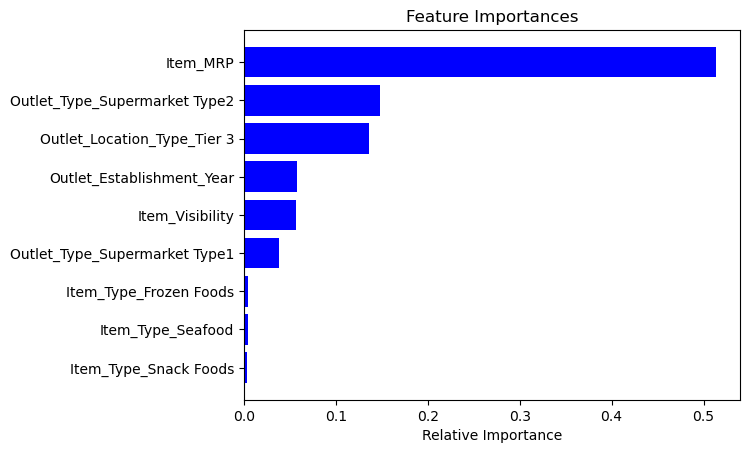

In [27]:
features = df_mart.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features (argsort returns the indices of the sorted array)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### 3.5 RECURSIVE FEATURE ELIMINATION

Follow the steps below to understand and apply the ‘Recursive Feature Elimination’ technique:

- First take all the `n` variables present in our dataset and train the model using them
- Calculate the performance of the model
- Compute the performance of the model after eliminating each variable (n times), i.e., drop one feature at a time and train the model on the remaining n-1 feature
- Identify the feature that produced the smallest (or no) change in the performance of the model, and then drop that feature
- Repeat this process until no features can be dropped

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn import datasets
linreg = LinearRegression()
rfe = RFE(linreg, n_features_to_select=10)
rfe = rfe.fit(X, y)

* The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. 
* Selected (i.e., estimated best) features are assigned rank 1.

In [29]:
rfe.ranking_

array([14,  1, 11,  4,  3, 13,  5, 18, 17,  6,  1, 12,  1, 19, 15,  2, 20,
        1,  1, 16,  1,  1,  9,  7, 10,  8,  1,  1,  1])

In [30]:
sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), selected_features))

[(1, 'Item_Type_Dairy'),
 (1, 'Item_Type_Fruits and Vegetables'),
 (1, 'Item_Type_Others'),
 (1, 'Item_Type_Seafood'),
 (1, 'Item_Type_Soft Drinks'),
 (1, 'Item_Type_Starchy Foods'),
 (1, 'Item_Visibility'),
 (1, 'Outlet_Type_Supermarket Type1'),
 (1, 'Outlet_Type_Supermarket Type2'),
 (1, 'Outlet_Type_Supermarket Type3'),
 (2, 'Item_Type_Household'),
 (3, 'Item_Fat_Content_Regular'),
 (4, 'Item_Fat_Content_Low Fat'),
 (5, 'Item_Fat_Content_reg'),
 (6, 'Item_Type_Canned'),
 (7, 'Outlet_Size_Small'),
 (8, 'Outlet_Location_Type_Tier 3'),
 (9, 'Outlet_Size_Medium'),
 (10, 'Outlet_Location_Type_Tier 2'),
 (11, 'Outlet_Establishment_Year'),
 (12, 'Item_Type_Frozen Foods'),
 (13, 'Item_Fat_Content_low fat'),
 (14, 'Item_MRP'),
 (15, 'Item_Type_Health and Hygiene'),
 (16, 'Item_Type_Snack Foods'),
 (17, 'Item_Type_Breakfast'),
 (18, 'Item_Type_Breads'),
 (19, 'Item_Type_Hard Drinks'),
 (20, 'Item_Type_Meat')]

### 3.6 FORWARD FEATURE SELECTION

This is the opposite process of the Recursive Feature Elimination we saw above. Instead of eliminating features, we try to find the best features which improve the performance of the model. This technique works as follows:

- Start with a single feature. Essentially, we train the model `n` number of times using each feature separately
- Feature giving the best performance is selected as the starting variable
- Repeat this process and add one feature at a time. The feature that produces the highest increase in performance is retained
- Repeat this process until no significant improvement is seen in the model’s performance

__NOTE__: Both Recursive Feature Elimination and Forward Feature Selection are time consuming and computationally expensive. They are practically only used on datasets that have a smaller number of feature.

In the next section, we will be working with the Fashion MNIST dataset, which consists of images belonging to different types of apparel, e.g. T-shirt, trousers, bag, etc. The dataset can be downloaded from the “IDENTIFY THE APPAREL” practice problem.

The dataset has a total of 70,000 images, out of which 60,000 are in the training set and the remaining 10,000 are test images. We will be working only on the training images. The train file is in a zip format. Once you extract the zip file, you will get a .csv file and a train folder which includes these 60,000 images. The corresponding label of each image can be found in the 'train.csv' file.

In [31]:
from sklearn.feature_selection import f_regression
ffs = f_regression(X, y )

In [32]:
features = []
for i in range(0, len(selected_features)-1):
    if ffs[0][i] >= 10:
       features.append(selected_features[i])

In [33]:
features

['Item_MRP',
 'Item_Visibility',
 'Outlet_Establishment_Year',
 'Outlet_Size_Medium',
 'Outlet_Size_Small',
 'Outlet_Location_Type_Tier 2',
 'Outlet_Location_Type_Tier 3',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Type_Supermarket Type2']

### 3.7 FACTOR ANALYSIS

Suppose we have two features: Income and Education. These features will potentially have a high correlation as people with a higher education level tend to have significantly higher income.

In the Factor Analysis technique, features are grouped by their correlations, i.e., all features in a particular group will have a high correlation among themselves, but a low correlation with variables of other group(s). Here, each group is known as a **factor**. These factors are small in number as compared to the original dimensions of the data. However, these factors are difficult to observe.

Let’s first read in all the images contained in the train folder:

In [34]:
fashion = pd.read_csv('fashion-mnist_train.csv')

In [35]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

In [ ]:
from keras.utils import to_categorical

X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))